In [1]:
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 pycountry



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [2]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from datetime import datetime


#Load the Data

In [4]:
file_path ='/content/KPMG_dataset.xlsx'

In [5]:
# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)

In [6]:
# List the sheet names in the XLSX file
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [7]:
# Read a specific sheet into a DataFrame
customer_demographic = pd.read_excel(file_path, sheet_name='CustomerDemographic', skiprows=1)

In [8]:
# Read a specific sheet into a DataFrame
customer_addresses = pd.read_excel(file_path, sheet_name='CustomerAddress', skiprows=1)

In [9]:
transactions = pd.read_excel(file_path, sheet_name='Transactions', skiprows=1)

In [10]:
# Display the first few rows of the DataFrame to verify it was read correctly
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
customer_addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [12]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#EDA of Customer Demographics

## 1. Data Completeness

In [13]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [14]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [15]:
# Check for missing values
missing_values = customer_demographic.isnull().sum()
missing_values

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

We can see that the table consists of some missing values in certain columns : 'last_name', 'DOB', 'job_title', 'job_industry_category', 'default', 'tenure'.

## 2. Data Accuracy

In [16]:
# Check for data types
data_types = customer_demographic.dtypes
data_types

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [17]:
customer_demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [18]:
# Check for duplicate customer IDs
duplicate_ids = customer_demographic['customer_id'].duplicated()
duplicate_count = duplicate_ids.sum()
print("Duplicate Customer IDs:", duplicate_count)

Duplicate Customer IDs: 0


There are no duplicate customer_ids, meaning each ID is unique

In [19]:
# Check for outliers or unexpected values
# You can define a range of valid customer IDs based on your business rules
valid_customer_id_range = (min(customer_demographic['customer_id']), max(customer_demographic['customer_id']))

print("Valid Customer ID Range:", valid_customer_id_range)

Valid Customer ID Range: (1, 4000)


all customer IDs in the dataset fall within this range, which means there are no outliers in terms of customer IDs

In [20]:
# Check for unexpected characters in first names and last names
unexpected_characters_first_name = customer_demographic[customer_demographic['first_name'].str.isalpha()]['first_name']
#unexpected_characters_last_name = customer_demographic[customer_demographic['last_name'].str.isalpha()]['last_name']

# Check for inconsistencies, such as titles or non-name entries
inconsistent_first_names = customer_demographic[customer_demographic['first_name'].str.contains('[0-9]')]
#inconsistent_last_names = df[df['last_name'].str.contains('[0-9]')]

# Display the results
print("First Names with Unexpected Characters:")
print(unexpected_characters_first_name)

print("\nLast Names with Unexpected Characters:")
#print(unexpected_characters_last_name)

print("\nInconsistent First Names (Containing Numbers):")
print(inconsistent_first_names[['customer_id', 'first_name']])

print("\nInconsistent Last Names (Containing Numbers):")
#print(inconsistent_last_names[['customer_id', 'last_name']])

First Names with Unexpected Characters:
0         Laraine
1             Eli
2           Arlin
3          Talbot
5            Curr
          ...    
3995      Rosalia
3996       Blanch
3997       Sarene
3998    Patrizius
3999        Kippy
Name: first_name, Length: 3983, dtype: object

Last Names with Unexpected Characters:

Inconsistent First Names (Containing Numbers):
Empty DataFrame
Columns: [customer_id, first_name]
Index: []

Inconsistent Last Names (Containing Numbers):


There are some first and last names that contain non-alphabetical characters that are not typical in a person's name. Examples of unexpected characters might include numbers, special symbols, or punctuation marks.

In [21]:
customer_demographic['gender'].unique().tolist()

['F', 'Male', 'Female', 'U', 'Femal', 'M']

The 'gender' column has entries for male and female specifies by 4 values : 'Male', 'Female', 'M', 'F' and it also has an entry 'U' which means 'Unidentified'. So we will group these data and make them more consistent and correct.

In [22]:
customer_demographic['gender'] = customer_demographic['gender'].replace({
    'F': 'Female',
    'M': 'Male',
    'Femal': 'Female'
})

In [23]:
# Extract the 'Past 3 Years Bike-Related Purchases' column
purchase_counts = customer_demographic['past_3_years_bike_related_purchases']

# Check for negative values
negative_values = purchase_counts[purchase_counts < 0]

# Check for unrealistic outliers (you can set a threshold as needed)
unrealistic_outliers = purchase_counts[purchase_counts > 100]  # Adjust the threshold as appropriate

# Display the results
print("Negative Purchase Counts:")
print(negative_values)

print("\nUnrealistic Outliers:")
print(unrealistic_outliers)

Negative Purchase Counts:
Series([], Name: past_3_years_bike_related_purchases, dtype: int64)

Unrealistic Outliers:
Series([], Name: past_3_years_bike_related_purchases, dtype: int64)


 There are no negative purchase counts or unrealistic outliers in the "Past 3 Years Bike-Related Purchases" column

In [24]:
# Calculate the reference date (current date)
current_date = datetime.now()

In [25]:
# Define a reasonable date range for DOB (e.g., last 80 years)
min_dob = current_date - pd.DateOffset(years=80)

In [26]:
# Check for unrealistic DOB values
unrealistic_dob = customer_demographic[customer_demographic['DOB'] > current_date]  # DOB in the future
unrealistic_dob = unrealistic_dob.append(customer_demographic[customer_demographic['DOB'] < min_dob])  # DOB too far in the past

# Print unrealistic DOB values
print("Unrealistic DOB Values:")
print(unrealistic_dob[['customer_id', 'DOB']])

Unrealistic DOB Values:
      customer_id        DOB
33             34 1843-12-21
719           720 1931-10-23
1091         1092 1935-08-22
2412         2413 1943-08-11
3409         3410 1940-09-22


In [27]:
missing_dob =  customer_demographic[ customer_demographic['DOB'].isnull()]
missing_dob

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [28]:
# Extract the 'job_title' column
job_titles = customer_demographic['job_title']

# Initialize lists to store findings
spelling_variations = []
abbreviations = []
non_standard_titles = []
special_characters = []

# Define a list of standard job titles or keywords
standard_job_titles = ["Manager", "Engineer", "Analyst", "Consultant", "Sales", "Teacher", "Doctor", "Nurse", "Technician"]

# Loop through job titles to identify patterns and inconsistencies
for title in job_titles:
    # Check if the title is a string (not NaN or float)
    if isinstance(title, str):
        # Spelling Variations
        if "Engineer" in title and "Eng." in title:
            spelling_variations.append(title)

        # Abbreviations
        if "Mgr." in title:
            abbreviations.append(title)

        # Non-standard Titles
        if title not in standard_job_titles:
            non_standard_titles.append(title)

        # Special Characters
        if not title.isalpha():
            special_characters.append(title)

# Display the findings
print("Job Titles with Spelling Variations:")
print(spelling_variations)

print("\nJob Titles with Abbreviations:")
print(abbreviations)

print("\nNon-Standard Job Titles:")
print(non_standard_titles)

print("\nJob Titles with Special Characters:")
print(special_characters)


Job Titles with Spelling Variations:
[]

Job Titles with Abbreviations:
[]

Non-Standard Job Titles:
['Executive Secretary', 'Administrative Officer', 'Recruiting Manager', 'Senior Editor', 'Media Manager I', 'Business Systems Development Analyst', 'Senior Quality Engineer', 'Nuclear Power Engineer', 'Developer I', 'Account Executive', 'Junior Executive', 'Media Manager IV', 'Sales Associate', 'Professor', 'Geological Engineer', 'Project Manager', 'Safety Technician I', 'Research Assistant I', 'Accounting Assistant III', 'Editor', 'Research Nurse', 'Senior Quality Engineer', 'Safety Technician III', 'Staff Accountant III', 'Legal Assistant', 'Product Engineer', 'Legal Assistant', 'Information Systems Manager', 'VP Quality Control', 'Social Worker', 'Senior Cost Accountant', 'Assistant Media Planner', 'Payment Adjustment Coordinator', 'Food Chemist', 'Accountant III', 'Director of Sales', 'Assistant Media Planner', 'Senior Financial Analyst', 'Registered Nurse', 'Biostatistician II', 'V

- This dataset includes job titles that do not conform to common industry roles or standard job titles. Examples include "Budget/Accounting Analyst I," "Nurse Practicioner," "Chief Design Engineer," and many others.

- This dataset includes job titles that contain special characters, numbers, or symbols not typical in job titles. Examples include "Media Manager I," "Biostatistician IV," and "Community Outreach Specialist." Depending on your data requirements, you may need to assess whether these titles are acceptable or if they should be standardized.

In [29]:
# Assuming your DataFrame is named 'df'
unique_categories = customer_demographic['job_industry_category'].unique()
print(unique_categories)

['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']


In [30]:
expected_categories = ["Health", "Financial Services", "Property", "IT", "Retail", "Agriculture", "Manufacturing", "Telecommunications", "Entertainment"]

In [31]:
unexpected_categories = [category for category in unique_categories if category not in expected_categories]
print("Unexpected Categories:", unexpected_categories)

Unexpected Categories: [nan, 'Argiculture']


In [32]:
category_counts = customer_demographic['job_industry_category'].value_counts()
print("Category Counts:\n", category_counts)


Category Counts:
 Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


"Manufacturing" and "Financial Services" are the most common industry categories among your customers.

In [33]:
# Assuming 'wealth_segment' is the column of interest
wealth_segment_column = customer_demographic['wealth_segment']

# 1. Check Unique Values:
unique_values = wealth_segment_column.unique()
print(unique_values)

['Mass Customer' 'Affluent Customer' 'High Net Worth']


In [34]:
expected_categories = ["Mass Customer", "High Net Worth", "Affluent Customer"]  # List of expected categories

# Check if unique values match the expected categories
unexpected_values = [value for value in unique_values if value not in expected_categories]

if unexpected_values:
    print("Unexpected Wealth Segment Values:")
    print(unexpected_values)
else:
    print("Wealth segment values match the expected categories.")

Wealth segment values match the expected categories.


In [35]:
# 2. Check for Consistency:
segment_counts = wealth_segment_column.value_counts()

# Display the counts of each wealth segment
print("\nWealth Segment Counts:")
print(segment_counts)


Wealth Segment Counts:
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


The "wealth_segment" column appears to have consistent and expected values. The counts align with the categories you mentioned earlier ("Mass Customer," "High Net Worth," and "Affluent Customer"). The counts show how many customers fall into each wealth segment category, providing valuable insights into the distribution of customer wealth segments within the dataset.

In [36]:
# Check unique values in the 'deceased_indicator' column
unique_deceased_values = customer_demographic['deceased_indicator'].unique()
print(unique_deceased_values)

['N' 'Y']


In [37]:
# Ensure that only 'Y' and 'N' are valid values for the 'deceased_indicator' column
valid_values = ['Y', 'N']

# Check for inconsistent values
inconsistent_values = [value for value in unique_deceased_values if value not in valid_values]

if inconsistent_values:
    # Print and handle inconsistent values
    print("Inconsistent values found in 'deceased_indicator':", inconsistent_values)

else:
    # No inconsistent values found, the data is consistent
    print("No inconsistent values found in 'deceased_indicator' column.")

No inconsistent values found in 'deceased_indicator' column.


In [38]:
# Examine unique values in the 'Default' column
unique_defaults =customer_demographic['default'].unique()
print(unique_defaults)

['"\'' "<script>alert('hi')</script>" datetime.datetime(2018, 2, 1, 0, 0)
 '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }' 'NIL'
 'ðµ ð ð ð' 'â°â´âµâââ' '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)' '0/0' 'ð©ð½'
 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ' 'nil' -100 'â°â´âµ' 'ð'
 1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416
 'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾' 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·' 'ÅâÂ´â°ËÃÂ¨ËÃâââ'
 'ï¼ï¼ï¼' '../../../../../../../../../../../etc/hosts'
 '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ' '<>?:"{}|_+' '\'\'\'\'"'
 ",./;'[]\\-=" '() { 0; }; touch /tmp/blns.shellshock1.fail;'
 'ì¬íê³¼íì ì´íì°êµ¬ì' 'testâ\xa0testâ«'
 '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð' nan
 '!@#$%^&*()' "'"
 'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«ÍiÌÌ¹ÍÌ³Ì³Ì®ÍÌ«nÍdÌ´ÌªÌÌ ÍÌ°ÍÌ©ÍÍÍÌ²TÍ¢ÍÌ¼ÍÌªhÍÍÌ®Ì»eÌ¬ÌÍÌ Ì¤Ì¹ÌWÍÍÍÌÌÍÍaÍÍÍÌ¹Ì¼'
 '../../../../../../../../../../../etc/passwd%00' 

The 'default' column seems to have some random text entries in it. And it seems to serve no purpose so it can be dropped from the table.

The output for the unique values in the "Default" column appears to contain a wide range of unexpected and non-standard values, including special characters, symbols, and unusual text strings. This suggests that there may be data quality issues or data entry errors in this column.

In [39]:
customer_demographic = customer_demographic.drop('default', axis=1)

In [40]:
# Check unique values in the "owns_car" column
unique_values = customer_demographic['owns_car'].unique()
print(unique_values)

['Yes' 'No']


In [41]:
# Check for inconsistencies (non-"Yes" or "No" values)
inconsistent_values = [value for value in unique_values if value not in ["Yes", "No"]]

# Print inconsistent values
if inconsistent_values:
    print("Inconsistent 'owns_car' values:", inconsistent_values)
else:
    print("All 'owns_car' values are consistent.")

All 'owns_car' values are consistent.


In [42]:
# Check for missing values in the "owns_car" column
missing_values = customer_demographic['owns_car'].isnull().sum()
print("Missing 'owns_car' values:", missing_values)

Missing 'owns_car' values: 0


In [43]:
# Check for negative tenure values
negative_tenure = customer_demographic[customer_demographic['tenure'] < 0]

# Check for unrealistic tenure values (you can define a threshold)
unrealistic_tenure = customer_demographic[customer_demographic['tenure'] > 100]  # Adjust the threshold as needed

# Display the rows with negative tenure values (if any)
print("Rows with Negative Tenure:")
print(negative_tenure)

# Display the rows with unrealistic tenure values (if any)
print("\nRows with Unrealistic Tenure:")
print(unrealistic_tenure)

Rows with Negative Tenure:
Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []

Rows with Unrealistic Tenure:
Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []


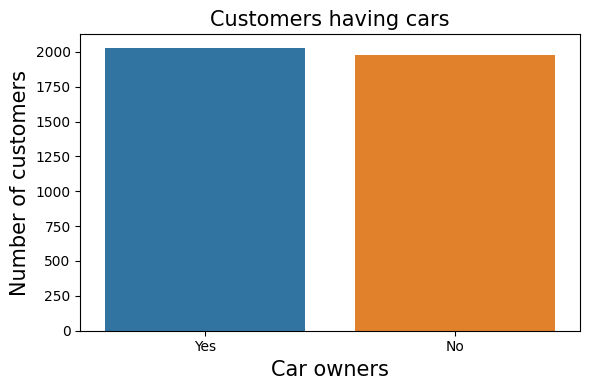

In [44]:
plt.figure(figsize=[6,4])
sns.countplot(x='owns_car', data=customer_demographic);
plt.title('Customers having cars', fontsize = 15);
plt.xlabel('Car owners', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

In [45]:
def Plots(x, color, title, xlab, ylab, *size):
    plt.figure(figsize=size)
    sns.countplot(x=x, data=customer_demographic, color = color);
    plt.title(title, fontsize = 15);
    plt.xlabel(xlab, fontsize = 15);
    plt.ylabel(ylab, fontsize = 15)
    plt.tight_layout()

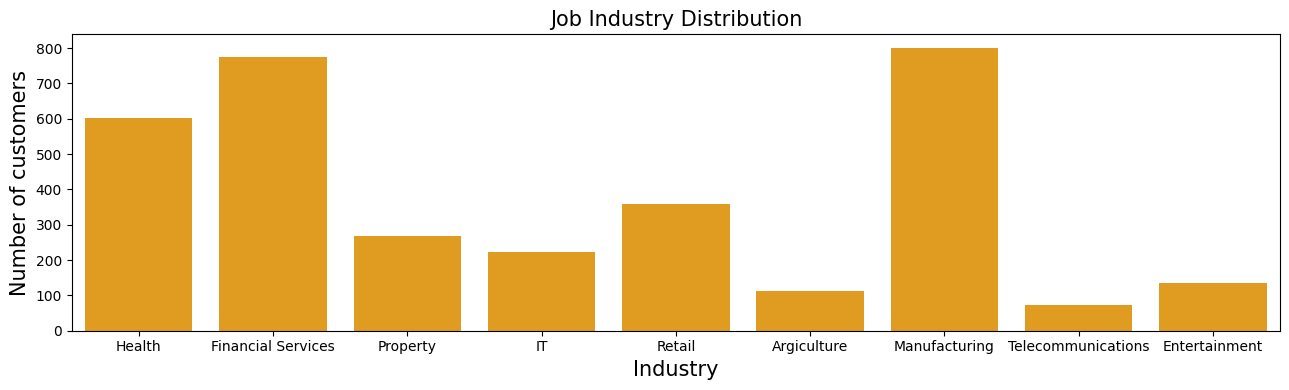

In [46]:
Plots("job_industry_category","orange","Job Industry Distribution","Industry","Number of customers",13,4)

Observations:

* There are a major number of customers under Manufacturing and Financial Services followed by Health
* The number of customers under Telecommunications followed by Agriculture are the least

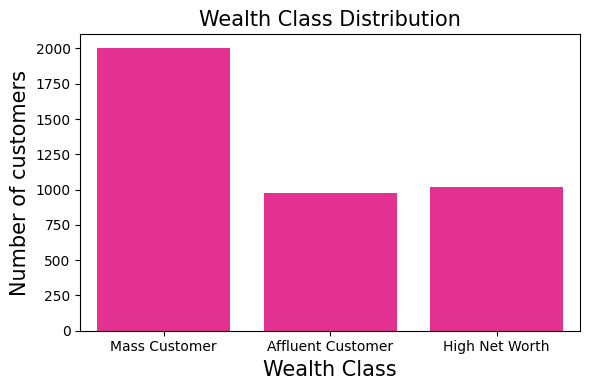

In [47]:
Plots("wealth_segment","deeppink","Wealth Class Distribution","Wealth Class","Number of customers",6,4)

Observations:

* There are a major number of customers under Mass Customer followed by High New Worth Customers
* The number of customers under Affleunt Customers and High New Worth Customers are almost equal

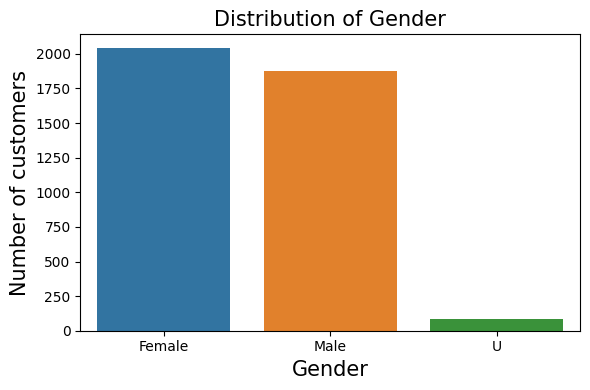

In [48]:
plt.figure(figsize=[6,4])
sns.countplot(x='gender', data=customer_demographic);
plt.title('Distribution of Gender', fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

Observations:

* As per the data being provided, it is seen that there are a greater number of Females than other genders
* The label U denotes the Unknown gender class

## 3. Data Redundancy

In [49]:
# Check for duplicate customer IDs
duplicate_customer_ids = customer_demographic[customer_demographic.duplicated(subset=['customer_id'], keep=False)]

# Display duplicate records (if any)
if not duplicate_customer_ids.empty:
    print("Duplicate Customer IDs:")
    print(duplicate_customer_ids)
else:
    print("No Duplicate Customer IDs Found")

No Duplicate Customer IDs Found


## 4. Data Integrity

In [50]:
# Use df.isnull().sum() to count missing values in each column
missing_values = customer_demographic.isnull().sum()

# Print the results to see the extent of missing data in each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64


## 5. Data Currency

In [51]:
# Define your reasonable tenure range
reasonable_tenure_range = (0, 20)  # Adjust based on your business history

# Filter rows where tenure is outside the reasonable range
tenure_outside_range = customer_demographic[(customer_demographic['tenure'] < reasonable_tenure_range[0]) | (customer_demographic['tenure'] > reasonable_tenure_range[1])]

# Display the customers with extreme tenure values
print("Customers with extreme tenure values:")
tenure_outside_range


Customers with extreme tenure values:


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
24,25,Geoff,Assaf,Male,72,1976-12-02,Accounting Assistant III,Financial Services,Mass Customer,N,Yes,21.0
27,28,Fee,Zellmer,Male,5,1973-09-30,Senior Quality Engineer,Health,Affluent Customer,N,Yes,21.0
35,36,Lurette,Stonnell,Female,33,1977-11-09,VP Quality Control,NaN,Affluent Customer,N,No,22.0
38,39,Hunfredo,Smalley,Male,5,1979-04-16,Assistant Media Planner,Entertainment,Mass Customer,N,No,22.0
61,62,Sorcha,Roggers,Female,38,1979-07-06,NaN,IT,Mass Customer,N,Yes,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3911,3912,Ryon,Darridon,Male,89,1986-10-27,Social Worker,Health,Affluent Customer,N,No,22.0
3913,3914,Izabel,Roelofs,Female,79,1988-05-21,Assistant Manager,Entertainment,Affluent Customer,N,Yes,22.0
3929,3930,Blancha,Baldi,Female,43,1988-01-06,NaN,Financial Services,High Net Worth,N,No,22.0
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0


Assuming Sprocket has been in existence for 20 years, there are customer records with tenure values above 20. These records represent customers who have been associated with your company for a longer period than expected based on your business's history

In [52]:
# Check for customers marked as deceased
deceased_customers = customer_demographic[customer_demographic['deceased_indicator'] == 'Y']

# Print the list of deceased customers
print("List of Deceased Customers:")
deceased_customers

# Count the number of deceased customers
num_deceased_customers = deceased_customers.shape[0]
print(f"Total Number of Deceased Customers:")
num_deceased_customers

List of Deceased Customers:
Total Number of Deceased Customers:


2

The presence of deceased customers in the dataset has implications for data currency. There are 2 customers marked as deceased, suggesting that there are individuals in the dataset who are no longer alive, according to the recorded information.

## Other Data Exploration

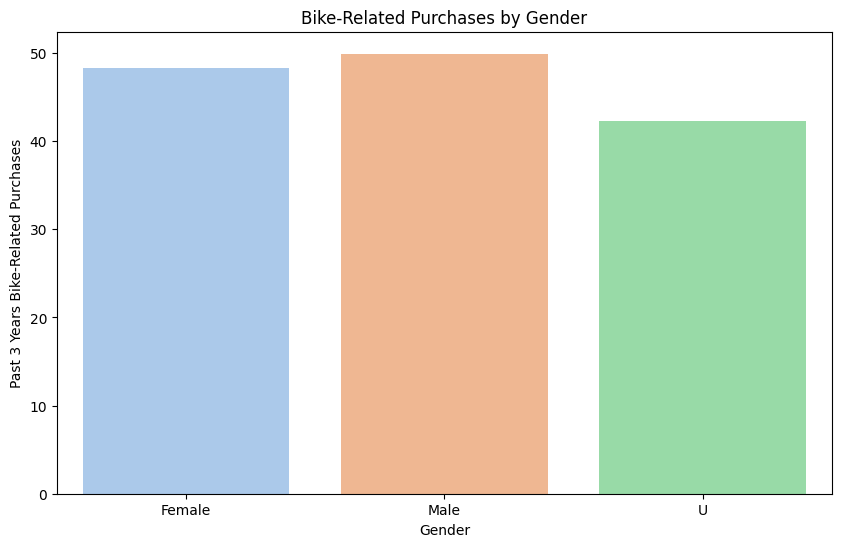

In [102]:
# Filter out rows where gender is not specified
customer_demographics_filtered = customer_demographic.dropna(subset=['gender'])

male_data = customer_demographics_filtered[customer_demographics_filtered['gender'] == 'Male']
female_data = customer_demographics_filtered[customer_demographics_filtered['gender'] == 'Female']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_demographics_filtered, x='gender', y='past_3_years_bike_related_purchases', ci=None, palette='pastel')
plt.title('Bike-Related Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Past 3 Years Bike-Related Purchases')
plt.show()

* Around 51% (25,212 bikes) males purchased a bike within the last 3 years and the female purchase sums up to 47% (23,765 bikes).
* The marketing team might develop campaigns that specifically target male customers, leveraging their higher engagement with biking-related products.


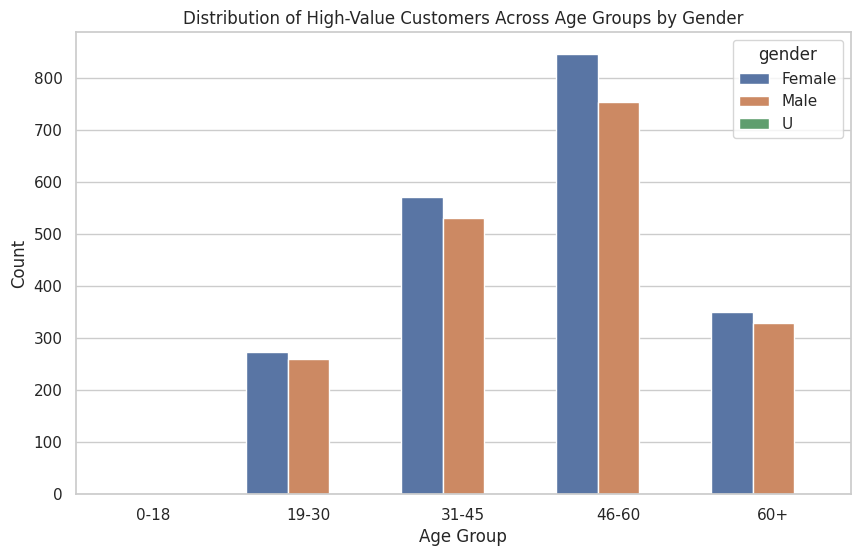

In [108]:
# Assuming 'DOB' is in datetime format
current_year = datetime.now().year
customer_demographic['age'] = current_year - customer_demographic['DOB'].dt.year

# Define age groups
bins = [0, 18, 30, 45, 60, float('inf')]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']

# Create 'age_group' column
customer_demographic['age_group'] = pd.cut(customer_demographic['age'], bins=bins, labels=labels, right=False)

# Plot the distribution of high-value customers across age groups
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='gender', data=customer_demographic)
plt.title('Distribution of High-Value Customers Across Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

* The age group "46-60" represents the largest proportion of high-value customers among the specified age categories.
* Consider tailoring marketing strategies specifically for customers aged 46-60.
* This age group might respond well to promotions, campaigns, or product features that align with their preferences and needs.


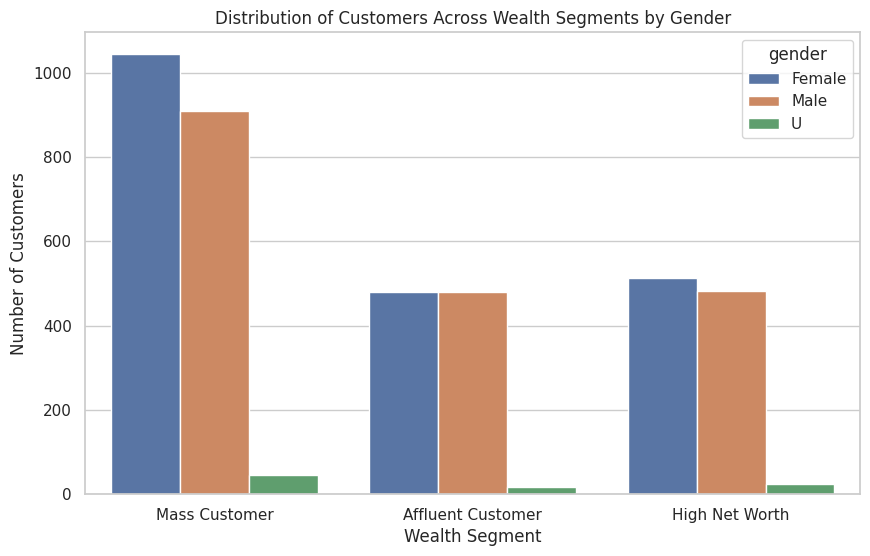

In [115]:
# Filter out missing values in the 'wealth_segment' and 'gender' columns
filtered_data = customer_demographic.dropna(subset=['wealth_segment', 'gender'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot to show the distribution of customers across different wealth segments
plt.figure(figsize=(10, 6))
sns.countplot(x='wealth_segment', hue='gender', data=filtered_data)

# Set plot labels and title
plt.title('Distribution of Customers Across Wealth Segments by Gender')
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


* "Mass Customer" especially females indicates that a large number of customers belong to this wealth segment.
* While having a large number of mass customers is positive for broad market reach, it's essential to ensure that your marketing strategies are also reaching and appealing to other wealth segments, especially if they are more profitable.


#EDA of Customer Addresses

## 1. Data Completeness

In [53]:
customer_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [54]:
customer_addresses.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [55]:
missing_values = customer_addresses.isnull().sum()

# Display the missing values count for each column
print("Missing Values:")
print(missing_values)

Missing Values:
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


The Customer Address Table is consisent and accurate. It contains no missing data as well as no duplicated data in it. The table seems to contain all the customer address information about customers in Australia

## 2. Data Accuracy

In [56]:
# Check for data types
data_types = customer_addresses.dtypes
data_types

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [57]:
customer_addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [58]:
# Check for duplicate rows based on 'customer_id'
duplicate_rows =customer_addresses[customer_addresses.duplicated(subset='customer_id', keep=False)]

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [59]:
# Calculate summary statistics
property_valuation_summary = customer_addresses['property_valuation'].describe()
print(property_valuation_summary)

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64


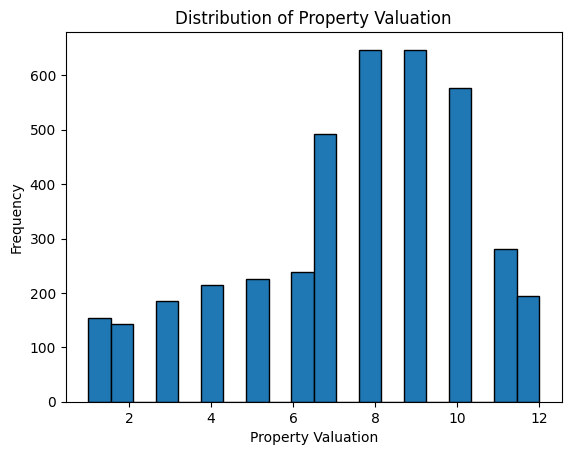

In [60]:
# Create a histogram to visualize the distribution
plt.hist(customer_addresses['property_valuation'], bins=20, edgecolor='k')
plt.xlabel('Property Valuation')
plt.ylabel('Frequency')
plt.title('Distribution of Property Valuation')
plt.show()

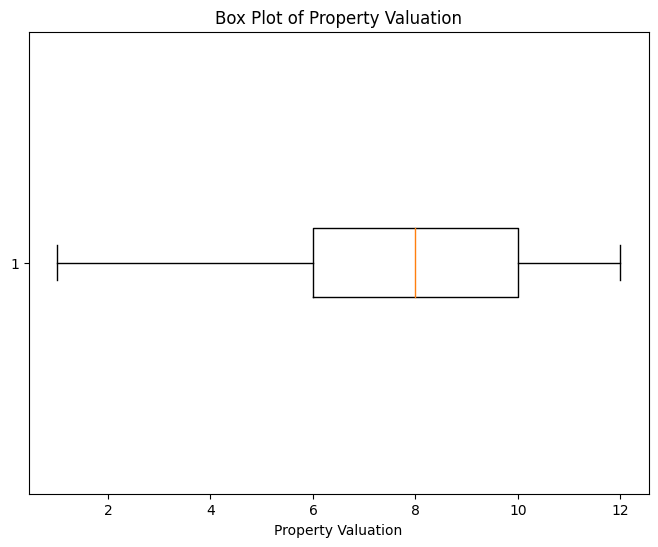

In [61]:
# Create a box plot for the property_valuation column
plt.figure(figsize=(8, 6))
plt.boxplot(customer_addresses['property_valuation'], vert=False)  # vert=False for a horizontal box plot
plt.xlabel('Property Valuation')
plt.title('Box Plot of Property Valuation')
plt.show()

In [62]:
# Calculate the IQR for property_valuation
Q1 = customer_addresses['property_valuation'].quantile(0.25)
Q3 = customer_addresses['property_valuation'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
potential_outliers =customer_addresses[(customer_addresses['property_valuation'] < lower_bound) | (customer_addresses['property_valuation'] > upper_bound)]

# Display potential outliers
print("Potential Outliers:")
print(potential_outliers)


Potential Outliers:
Empty DataFrame
Columns: [customer_id, address, postcode, state, country, property_valuation]
Index: []


In [63]:
# Calculate the z-score
from scipy import stats
z_scores = stats.zscore(customer_addresses['property_valuation'])

# Define a z-score threshold (e.g., 3)
z_threshold = 3

# Identify outliers based on z-score
outliers = df[abs(z_scores) > z_threshold]

# Optional: Remove outliers from the dataset
# df = df[abs(z_scores) <= z_threshold]

# Display identified outliers
print(outliers)

Empty DataFrame
Columns: [Unnamed: 0, Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. , Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6, Unnamed: 7, Unnamed: 8]
Index: []


There are no outliers in Property valuation

In [64]:
import re

# Define a regex pattern for a valid address format (customize as needed)
address_pattern = r'^\d+\s[A-Za-z\s]+$'  # Example: "123 Main Street"

# Create a boolean mask indicating whether each address matches the pattern
valid_address_mask = customer_addresses['address'].str.match(address_pattern)

# Find rows with addresses that do not match the expected pattern
invalid_addresses = customer_addresses[~valid_address_mask]

# Display the rows with invalid addresses
print("Rows with Invalid Addresses:")
invalid_addresses

Rows with Invalid Addresses:


,customer_id,address,postcode,state,country,property_valuation
7,9,97736 7th Trail,2023,New South Wales,Australia,12
15,18,092 2nd Alley,2135,New South Wales,Australia,12
20,25,28 5th Center,4413,QLD,Australia,3
55,60,39 3rd Drive,2026,New South Wales,Australia,10
128,133,19392 7th Trail,4744,QLD,Australia,1
205,210,19969 5th Parkway,3152,VIC,Australia,9
225,230,4 5th Point,2075,NSW,Australia,11
242,247,2 2nd Plaza,2283,NSW,Australia,4
288,293,00 5th Lane,2830,NSW,Australia,2
318,323,82 8th Alley,4210,QLD,Australia,9


There are some addresses on the "address" column in your Customer Addresses dataset that don't follow expected patterns or formats such as 123 Main Street

In [65]:
def Plots(x, color, title, xlab, ylab, *size):
    plt.figure(figsize=size)
    sns.countplot(x=x, data=customer_addresses, color = color);
    plt.title(title, fontsize = 15);
    plt.xlabel(xlab, fontsize = 15);
    plt.ylabel(ylab, fontsize = 15)
    plt.tight_layout()

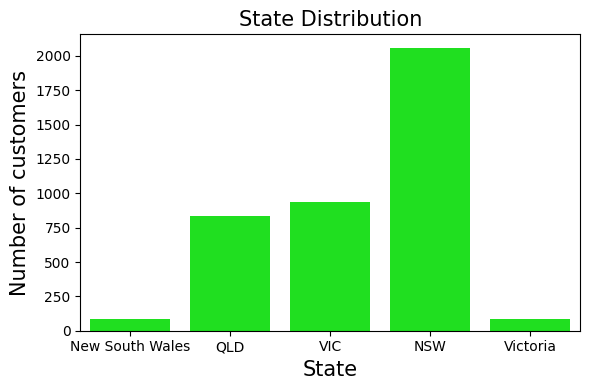

In [66]:
Plots("state","lime","State Distribution","State","Number of customers",6,4)

Observations:

* There are a major number of customers from NSW in the data
* The number of customers from Victoria and New South Wales are the least

## 3. Data Consistency

In [67]:
!pip install pycountry
import pycountry

# Get a list of valid country names
country_names = [country.name for country in pycountry.countries]

# Use country_names for validation
valid_countries = customer_addresses['country'].isin(country_names).all()
print("All Countries are valid:", valid_countries)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=1773f8d09c28e51a4750d475d725df96d277067ee72035d23bb7ef6055472997
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
All Countries are valid: True


In [68]:
# Get a list of valid state names using pycountry
valid_state_names = [state.name for state in pycountry.subdivisions]

# Check if the 'state' column contains only valid state names
valid_states = customer_addresses['state'].isin(valid_state_names).all()

# Print the result
print("All states are valid:", valid_states)

All states are valid: False


## 4. Data Redundancy

In [69]:
# Check for duplicate rows based on all columns
duplicate_rows = customer_addresses[customer_addresses.duplicated()]

# If there are any duplicate rows, they will be stored in the duplicate_rows DataFrame
# You can display these duplicate rows to examine them
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [customer_id, address, postcode, state, country, property_valuation]
Index: []


There are no duplicate records.

#EDA of Transactions

## 1. Data Completeness

In [70]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

* "online_order", "brand," "product_line," "product_class," "product_size," "standard_cost," and "product_first_sold_date" have missing values.

* We can also notice that the 'product_first_sold_date' column is of float datatype which has to be changed to date format.

In [71]:
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')

In [72]:
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [73]:
missing_values = transactions.isnull().sum()

# Display the missing values count for each column
print("Missing Values:")
print(missing_values)

Missing Values:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


In [74]:
transactions.duplicated().sum()

0

We can see that there are many missing values in the data and that there are no duplicates. We might have to drop the missing values or fill those using suitable values, which we will do later if needed for further analysis.

## 2. Data Accuracy

In [75]:
# Count non-null values in the "online_order" column
online_order_count = transactions['online_order'].count()
print("Count of Non-null Online Orders:", online_order_count)

Count of Non-null Online Orders: 19640


In [76]:
order_status_counts = transactions['order_status'].value_counts()
print("Order Status Value Counts:")
print(order_status_counts)


Order Status Value Counts:
Approved     19821
Cancelled      179
Name: order_status, dtype: int64


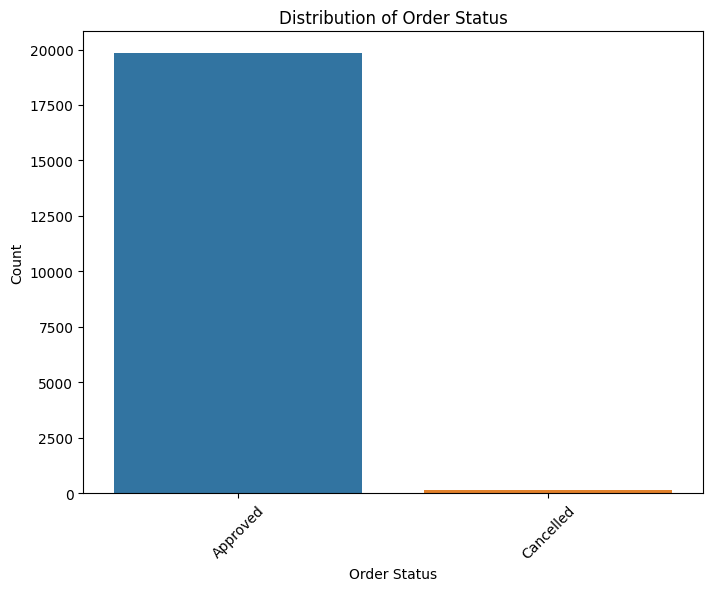

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='order_status')
plt.title("Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

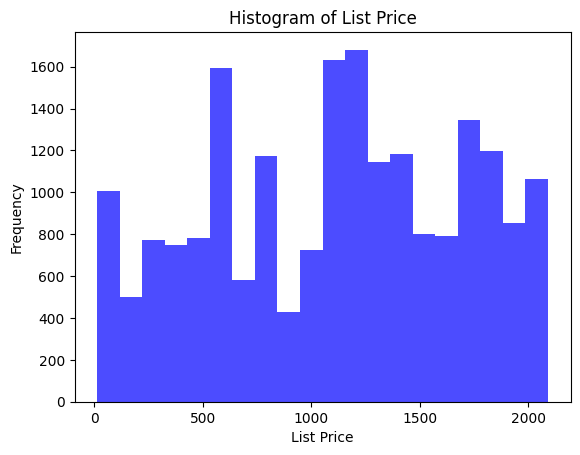

In [78]:
# Assuming df is your Transactions dataset and 'list_price' is the column to visualize
plt.hist(transactions['list_price'], bins=20, color='blue', alpha=0.7)
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.title('Histogram of List Price')
plt.show()

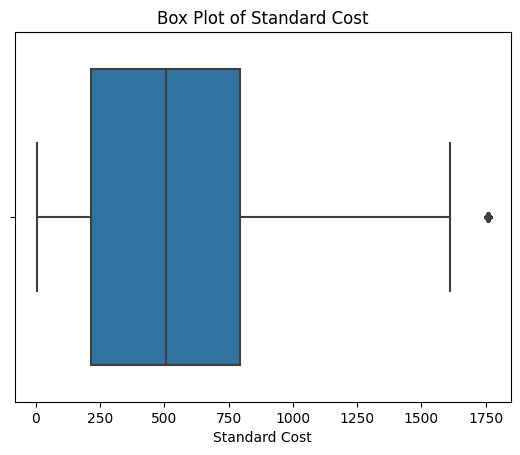

In [79]:
# Assuming df is your Transactions dataset and 'standard_cost' is the column to visualize
sns.boxplot(x=transactions['standard_cost'])
plt.xlabel('Standard Cost')
plt.title('Box Plot of Standard Cost')
plt.show()

The presence of outliers in the "standard_cost" column indicates that some data points have values significantly different from the majority of the data. This could be because of data entry errors, pricing discrepancies or product variability

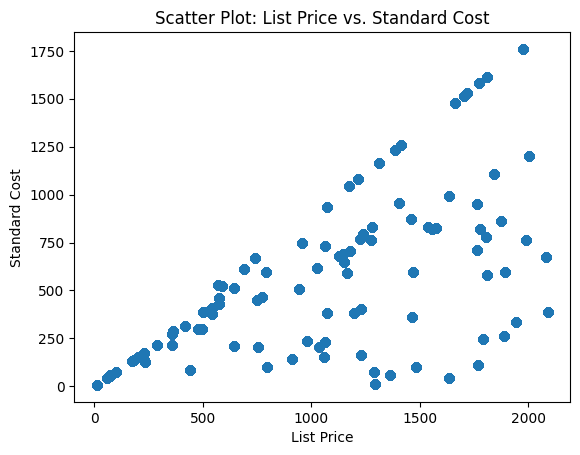

In [80]:
# Assuming df is your Transactions dataset and you want to create a scatter plot between 'list_price' and 'standard_cost'
plt.scatter(transactions['list_price'], transactions['standard_cost'], alpha=0.5)
plt.xlabel('List Price')
plt.ylabel('Standard Cost')
plt.title('Scatter Plot: List Price vs. Standard Cost')
plt.show()

## 3. Data Consistency

In [81]:
# Check for price and cost consistency
inconsistent_prices = transactions[transactions['list_price'] <= transactions['standard_cost']]

# Display rows with inconsistent prices and costs
if not inconsistent_prices.empty:
    print("Rows with inconsistent prices and costs:")
    print(inconsistent_prices)
else:
    print("No inconsistent prices and costs found.")

No inconsistent prices and costs found.


All list prices are higher than standard costs for all products.

In [82]:
# Convert 'product_first_sold_date' to datetime if needed
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s', errors='coerce')
transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [83]:
#convert date columns from integer to datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], unit='s')
transactions['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [84]:
# Check for missing dates in 'transaction_date' and 'product_first_sold_date'
missing_transaction_dates = transactions['transaction_date'].isnull()
missing_product_dates = transactions['product_first_sold_date'].isnull()

In [85]:
current_date = pd.Timestamp.now()
future_transaction_dates = transactions['transaction_date'] > current_date
future_product_dates = transactions['product_first_sold_date'] > current_date

In [86]:
print('Missing Transaction Dates', missing_transaction_dates.sum())
print('Missing Product Dates', missing_product_dates.sum())
print('Future Transaction Dates', future_transaction_dates.sum())
print('Future Product Dates', future_product_dates.sum())

Missing Transaction Dates 0
Missing Product Dates 197
Future Transaction Dates 0
Future Product Dates 0


In [87]:
unique_order_status = transactions['order_status'].unique()
unique_brand = transactions['brand'].unique()
unique_product_line = transactions['product_line'].unique()
unique_product_size = transactions['product_size'].unique()
unique_product_class = transactions['product_class'].unique()

print("Unique order status:", unique_order_status)
print("Unique brand:", unique_brand)
print("Unique product line:", unique_product_line)
print("Unique product size:", unique_product_size)
print("Unique product class:", unique_product_class)

Unique order status: ['Approved' 'Cancelled']
Unique brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Unique product line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
Unique product size: ['medium' 'large' 'small' nan]
Unique product class: ['medium' 'low' 'high' nan]


In [88]:
negative_values = transactions[(transactions['list_price'] < 0) | (transactions['standard_cost'] < 0) | (transactions['online_order'] < 0)]
unrealistic_values = transactions[(transactions['list_price'] < 0) | (transactions['list_price'] > 10000) | (transactions['standard_cost'] < 0) | (transactions['standard_cost'] > 10000) | (transactions['online_order'] < 0) | (transactions['online_order'] > 10000)]

print("Negative values:", negative_values)
print("Unrealistic values:")
unrealistic_values

Negative values: Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []
Unrealistic values:


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


## 4. Data Currency

In [89]:
date_range = (transactions['transaction_date'].min(), transactions['transaction_date'].max())
date_range

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [90]:
from datetime import datetime

# Ensure that the "transaction_date" column is in datetime format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Find the latest transaction date
latest_transaction_date = transactions['transaction_date'].max()

# Get the current date
current_date = datetime.now().date()

# Calculate the time difference
time_difference = current_date - latest_transaction_date.date()

print("Latest Transaction Date:", latest_transaction_date.date())
print("Current Date:", current_date)
print("Time Difference (Days):", time_difference.days)

Latest Transaction Date: 2017-12-30
Current Date: 2023-10-16
Time Difference (Days): 2116


In [91]:
# Check unique values in the "online_order" column
unique_online_order_values = transactions['online_order'].unique()
print("Unique Online Order Values:", unique_online_order_values)

Unique Online Order Values: [ 0.  1. nan]


In [92]:
unique_order_statuses = transactions['order_status'].unique()
print("Unique Order Status Values:")
print(unique_order_statuses)

Unique Order Status Values:
['Approved' 'Cancelled']


In [93]:
# Check unique values in the 'brand' column
unique_brands = transactions['brand'].unique()
print("Unique Brands:", unique_brands)

Unique Brands: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]


In [94]:
# Define expected data types for each column
expected_data_types = {
    'transaction_id': int,
    'product_id': int,
    'customer_id': int,
    'transaction_date': 'datetime64[ns]',
    'online_order': float,  # Assuming this column can have NaN values
    'order_status': str,     # Assuming order status is a string
    'brand': str,
    'product_line': str,
    'product_class': str,
    'product_size': str,
    'list_price': float,
    'standard_cost': float,
    'product_first_sold_date': 'datetime64[ns]'  # Assuming this column represents a numeric value
}

# Check data types and enforce them
for column, data_type in expected_data_types.items():
    if column in transactions.columns:
        transactions[column] = transactions[column].astype(data_type)

# Now, the DataFrame 'df' should have the specified data types for each column.

# You can verify the data types of each column using the dtypes attribute:
print(transactions.dtypes)

# If you encounter errors during conversion (e.g., due to incompatible data), you may need to address those issues separately.


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object
